In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [43]:
df = pd.read_csv('C:/Users/User/Desktop/Results/FACEBOOK FILES/merged_file_final_fb.csv')

In [44]:
to_drop = ['image_id', 'Facebook Id', 'Page Category', 'Page Name', 'Page Description', 'Page Created', 'Post Created',
           'Post Created Date', 'Type', 'Love', 'Wow', 'Haha', 'Sad', 'Angry' , 'Care',
           'Video Share Status', 'Is Video Owner?', 'Post Views', 'Total Views', 'Total Views For All Crossposts', 
           'Video Length', 'URL', 'Message', 'Link', 'Final Link', 'Image Text', 'Link Text', 'Description', 'Sponsor Id', 
           'Sponsor Name', 'Sponsor Category', 'Likes', 'Comments', 'Shares','User Name', 'Page Admin Top Country', 'Likes at Posting', 'Post Created Time',
           'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )']
#'Likes', 'Comments', 'Shares', 'Likes at Posting'

df = df.drop(to_drop, axis=1)
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,green,...,127,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,1,0,0,0,blue,...,312,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,1,2,0,0,0,1,grey,...,77,HIGH,0,0,0,0,0,1,0,0
3,0,1,0,1,1,0,0,0,0,purple,...,332,HIGH,0,1,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,grey,...,71,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,cyan,...,269,HIGH,0,1,0,0,0,1,0,0
2566,0,0,0,0,0,1,0,0,0,blue,...,211,LOW,0,0,0,0,0,0,0,0
2567,0,1,1,1,2,0,0,0,0,cyan,...,162,HIGH,0,1,0,0,0,0,0,0
2568,1,1,0,1,2,0,0,0,0,grey,...,133,HIGH,0,1,0,0,0,0,1,0


In [45]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [46]:
df = change_types(df)

In [47]:
df.dtypes

Child                    int64
Smile                    int64
Female                   int64
Male                     int64
PeopleNumber             int64
Text                     int64
close_up                 int64
Indoors                  int64
Outdoors                 int64
dominantColor           object
LOGO                     int64
Followers at Posting     int64
Total Interactions       int64
Contrast                object
ANGRY                    int64
CALM                     int64
CONFUSED                 int64
DISGUSTED                int64
FEAR                     int64
HAPPY                    int64
SAD                      int64
SURPRISED                int64
dtype: object

In [48]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0
mean,0.4,0.8,0.7,0.4,1.2,0.2,0.0,0.1,0.1,0.6,8070202.2,74754.6,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,12171064.1,387478.2,0.1,0.5,0.1,0.0,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7233.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,138347.2,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,865509.5,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,26164014.0,4240.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,5750308.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


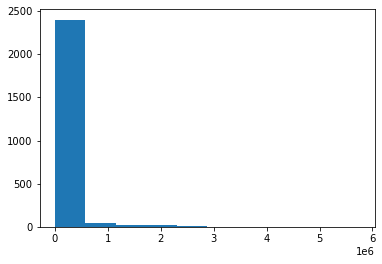

In [49]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [ ]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]

In [ ]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

In [50]:
df[df['Total Interactions']>100000].count()

Child                   148
Smile                   148
Female                  148
Male                    148
PeopleNumber            148
Text                    148
close_up                148
Indoors                 148
Outdoors                148
dominantColor           148
LOGO                    148
Followers at Posting    148
Total Interactions      148
Contrast                148
ANGRY                   148
CALM                    148
CONFUSED                148
DISGUSTED               148
FEAR                    148
HAPPY                   148
SAD                     148
SURPRISED               148
dtype: int64

In [51]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

0       1.739321
1       4.263926
2       1.051539
3       4.525442
4       0.967250
          ...   
2565    1.760828
2566    1.379175
2567    1.055932
2568    0.856490
2569    0.594462
Length: 2500, dtype: float64

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2500.000000
mean        4.011071
std        14.722096
min         0.004986
25%         0.266636
50%         0.682544
75%         1.719638
max       220.533212
dtype: float64

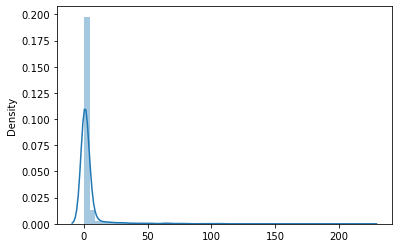

In [52]:
sns.distplot(y)
y.describe()

In [53]:
y[y<y.median()].count()

1250

In [54]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,green,0,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,1,0,0,0,blue,0,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,1,2,0,0,0,1,grey,0,HIGH,0,0,0,0,0,1,0,0
3,0,1,0,1,1,0,0,0,0,purple,0,HIGH,0,1,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,grey,0,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,1,0,0
2566,0,0,0,0,0,1,0,0,0,blue,1,LOW,0,0,0,0,0,0,0,0
2567,0,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,0,0,0
2568,1,1,0,1,2,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,1,0


In [55]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,1,2,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2566,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2567,0,1,1,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2568,1,1,0,1,2,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [56]:
X.dtypes

Child                   int64
Smile                   int64
Female                  int64
Male                    int64
PeopleNumber            int64
Text                    int64
close_up                int64
Indoors                 int64
Outdoors                int64
LOGO                    int64
ANGRY                   int64
CALM                    int64
CONFUSED                int64
DISGUSTED               int64
FEAR                    int64
HAPPY                   int64
SAD                     int64
SURPRISED               int64
dominantColor_blue      uint8
dominantColor_brown     uint8
dominantColor_cyan      uint8
dominantColor_green     uint8
dominantColor_grey      uint8
dominantColor_orange    uint8
dominantColor_pink      uint8
dominantColor_purple    uint8
dominantColor_red       uint8
dominantColor_white     uint8
dominantColor_yellow    uint8
Contrast_HIGH           uint8
Contrast_LOW            uint8
dtype: object

In [57]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [58]:
X = change_types(X)

In [59]:
X.dtypes

Child                   int64
Smile                   int64
Female                  int64
Male                    int64
PeopleNumber            int64
Text                    int64
close_up                int64
Indoors                 int64
Outdoors                int64
LOGO                    int64
ANGRY                   int64
CALM                    int64
CONFUSED                int64
DISGUSTED               int64
FEAR                    int64
HAPPY                   int64
SAD                     int64
SURPRISED               int64
dominantColor_blue      int64
dominantColor_brown     int64
dominantColor_cyan      int64
dominantColor_green     int64
dominantColor_grey      int64
dominantColor_orange    int64
dominantColor_pink      int64
dominantColor_purple    int64
dominantColor_red       int64
dominantColor_white     int64
dominantColor_yellow    int64
Contrast_HIGH           int64
Contrast_LOW            int64
dtype: object

In [60]:
#CLASSIFICATION

In [61]:
y_new = []

for i in y:
    if i<y.median():
        y_new.append('0')
    else:
        y_new.append('1')

In [62]:
print(y_new.count('0'))
print(y_new.count('1'))

1250
1250


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42, stratify=y_new)

In [64]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.606

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y_new, cv=10) # cv --> 
scores.mean()

0.5552

In [66]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
print(clf.score(X_test, y_test))
# print(metrics.f1_score(y_test, y_pred, labels=['low', 'high']))
print(metrics.confusion_matrix(y_test, y_pred))

0.584
[[134 116]
 [ 92 158]]


In [67]:
scores = cross_val_score(clf, X, y_new, cv=10)  
scores.mean()

0.5344

In [68]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.576

In [69]:
scores = cross_val_score(neigh, X, y_new, cv=10) # cv --> 
scores.mean()

0.5324

In [70]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.56

In [71]:
scores = cross_val_score(svc, X, y_new, cv=10) 
scores.mean()

0.5304

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.57

In [73]:
scores = cross_val_score(lr, X, y_new, cv=10) # cv --> 
scores.mean()

0.5351999999999999

In [74]:
for imp, name in zip(clf.feature_importances_, clf.feature_names_in_):
    print(name, imp)

Child 0.03
Smile 0.04
Female 0.13
Male 0.09
PeopleNumber 0.16
Text 0.06
close_up 0.03
Indoors 0.02
Outdoors 0.02
LOGO 0.04
ANGRY 0.02
CALM 0.01
CONFUSED 0.02
DISGUSTED 0.02
FEAR 0.01
HAPPY 0.04
SAD 0.02
SURPRISED 0.02
dominantColor_blue 0.02
dominantColor_brown 0.02
dominantColor_cyan 0.01
dominantColor_green 0.02
dominantColor_grey 0.02
dominantColor_orange 0.01
dominantColor_pink 0.02
dominantColor_purple 0.02
dominantColor_red 0.01
dominantColor_white 0.02
dominantColor_yellow 0.02
Contrast_HIGH 0.03
Contrast_LOW 0.0


In [75]:
# Sorted feature importances
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

PeopleNumber            0.16
Female                  0.13
Male                    0.09
Text                    0.06
HAPPY                   0.04
LOGO                    0.04
Smile                   0.04
Contrast_HIGH           0.03
Child                   0.03
close_up                0.03
Outdoors                0.02
dominantColor_blue      0.02
dominantColor_pink      0.02
dominantColor_white     0.02
dominantColor_grey      0.02
dominantColor_green     0.02
ANGRY                   0.02
dominantColor_brown     0.02
SURPRISED               0.02
SAD                     0.02
Indoors                 0.02
dominantColor_yellow    0.02
DISGUSTED               0.02
CONFUSED                0.02
dominantColor_purple    0.02
dominantColor_red       0.01
dominantColor_cyan      0.01
dominantColor_orange    0.01
FEAR                    0.01
CALM                    0.01
Contrast_LOW            0.00
dtype: float64